In [1]:
import os
# If you are running this from ~/python_scripts/mycode.py
# change directory to the root of the repository
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../')

import numpy as np
import pandas as pd
import networkx as nx


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 12, 'font.style': 'normal',  'font.family':'serif', 'figure.facecolor':'white'})

from utils.spatial_coarse_grain import spatial_coarse_grain
#from utils.visualization import coarse_grained_visualization
from utils.visualization_networkx import *

In [2]:
method_title = 'spatial_coarse_grain'

In [6]:
G_micro = nx.karate_club_graph()

radius =0.6
mapping, weighted_edgelist = spatial_coarse_grain(G_micro,radius)


# building the coarse grained graph (nx)
G_macro = nx.from_pandas_edgelist(weighted_edgelist, edge_attr='weight')
# adding isolated nodes
G_macro.add_nodes_from(mapping['macro'].values)

NOTE: The nodes of G do not have a spatial position.
        The position has been computed using a spring_layout


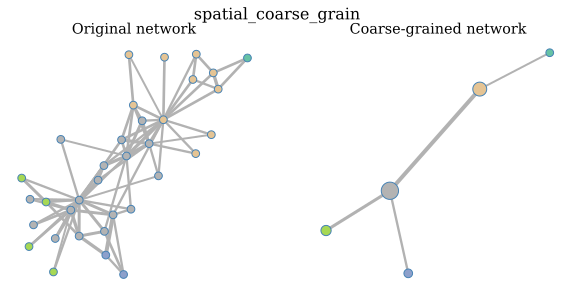

<Figure size 640x480 with 0 Axes>

In [7]:
visualize_micro_macro(G_micro, mapping, G_macro, all_colorful = True, method_title=method_title, 
                      name_file = f'KC_colorful_{method_title}', file_format='png')

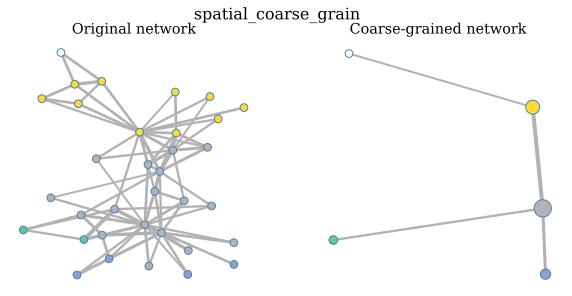

<Figure size 640x480 with 0 Axes>

In [8]:
visualize_micro_macro(G_micro, mapping, G_macro, all_colorful = False, method_title=method_title, 
                      name_file = f'KC_{method_title}', file_format='png')